In [33]:
# Import the dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [35]:
from citipy import citipy

In [36]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [37]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b721cc4ca5a458eeffd785a45371f4e0


In [38]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [39]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [40]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [41]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaitape
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | pulwama
Processing Record 6 of Set 1 | touros
Processing Record 7 of Set 1 | burley
Processing Record 8 of Set 1 | muriti
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | luhyny
Processing Record 13 of Set 1 | san juan
Processing Record 14 of Set 1 | ostrovnoy
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | haikou
Processing Record 22 of Set 1 | glad

Processing Record 39 of Set 4 | longyearbyen
Processing Record 40 of Set 4 | ca mau
Processing Record 41 of Set 4 | abeche
Processing Record 42 of Set 4 | port alfred
Processing Record 43 of Set 4 | mar del plata
Processing Record 44 of Set 4 | husavik
Processing Record 45 of Set 4 | tuy hoa
Processing Record 46 of Set 4 | waddan
Processing Record 47 of Set 4 | zambezi
Processing Record 48 of Set 4 | lagoa
Processing Record 49 of Set 4 | pevek
Processing Record 50 of Set 4 | kemijarvi
Processing Record 1 of Set 5 | znamenskoye
Processing Record 2 of Set 5 | namatanai
Processing Record 3 of Set 5 | korla
Processing Record 4 of Set 5 | utiroa
City not found. Skipping...
Processing Record 5 of Set 5 | miri
Processing Record 6 of Set 5 | thano bula khan
City not found. Skipping...
Processing Record 7 of Set 5 | czluchow
Processing Record 8 of Set 5 | aztec
Processing Record 9 of Set 5 | saldanha
Processing Record 10 of Set 5 | tasiilaq
Processing Record 11 of Set 5 | varnavino
Processing R

Processing Record 26 of Set 8 | hingorja
Processing Record 27 of Set 8 | montreux
Processing Record 28 of Set 8 | nishihara
Processing Record 29 of Set 8 | warwick
Processing Record 30 of Set 8 | sawai madhopur
Processing Record 31 of Set 8 | kaifeng
Processing Record 32 of Set 8 | vila do maio
Processing Record 33 of Set 8 | godean
Processing Record 34 of Set 8 | limon
Processing Record 35 of Set 8 | san estanislao
Processing Record 36 of Set 8 | lorengau
Processing Record 37 of Set 8 | baghmara
Processing Record 38 of Set 8 | katsuura
Processing Record 39 of Set 8 | kumano
Processing Record 40 of Set 8 | sortland
Processing Record 41 of Set 8 | abu dhabi
Processing Record 42 of Set 8 | emerald
Processing Record 43 of Set 8 | nome
Processing Record 44 of Set 8 | hambantota
Processing Record 45 of Set 8 | bilibino
Processing Record 46 of Set 8 | grand baie
Processing Record 47 of Set 8 | sosnovo-ozerskoye
Processing Record 48 of Set 8 | yar-sale
Processing Record 49 of Set 8 | carutape

Processing Record 16 of Set 12 | dingle
Processing Record 17 of Set 12 | hit
Processing Record 18 of Set 12 | sao joao da barra
Processing Record 19 of Set 12 | santa isabel
Processing Record 20 of Set 12 | guajara
Processing Record 21 of Set 12 | karasburg
Processing Record 22 of Set 12 | maningrida
Processing Record 23 of Set 12 | yeehaw junction
City not found. Skipping...
Processing Record 24 of Set 12 | chandbali
Processing Record 25 of Set 12 | ambon
Processing Record 26 of Set 12 | cumpas
Processing Record 27 of Set 12 | galveston
Processing Record 28 of Set 12 | norden
Processing Record 29 of Set 12 | alofi
Processing Record 30 of Set 12 | wilmington
Processing Record 31 of Set 12 | tuatapere
Processing Record 32 of Set 12 | uk
City not found. Skipping...
Processing Record 33 of Set 12 | kodinsk
Processing Record 34 of Set 12 | kalinovskoye
Processing Record 35 of Set 12 | penzance
Processing Record 36 of Set 12 | taitung
Processing Record 37 of Set 12 | tikaitnagar
Processing 

In [42]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaitape,-16.5167,-151.7500,80.17,71,3,5.23,PF,2022-04-20 18:01:26
1,Thompson,55.7435,-97.8558,31.44,85,100,9.62,CA,2022-04-20 18:00:09
2,Nanortalik,60.1432,-45.2371,31.19,58,47,12.46,GL,2022-04-20 18:01:26
3,Pulwama,33.8740,74.8996,52.72,86,67,0.74,IN,2022-04-20 18:01:27
4,Touros,-5.1989,-35.4608,85.23,65,92,14.07,BR,2022-04-20 18:01:27
5,Burley,42.5357,-113.7928,51.21,36,52,6.76,US,2022-04-20 17:59:00
6,Muriti,-1.9833,32.9167,72.84,78,100,10.67,TZ,2022-04-20 18:01:27
7,Tuktoyaktuk,69.4541,-133.0374,5.45,97,98,2.66,CA,2022-04-20 18:01:28
8,Hobart,-42.8794,147.3294,49.86,70,40,18.41,AU,2022-04-20 17:57:14
9,Luhyny,51.0820,28.4006,43.30,75,100,5.50,UA,2022-04-20 18:01:28


In [43]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaitape,PF,2022-04-20 18:01:26,-16.5167,-151.7500,80.17,71,3,5.23
1,Thompson,CA,2022-04-20 18:00:09,55.7435,-97.8558,31.44,85,100,9.62
2,Nanortalik,GL,2022-04-20 18:01:26,60.1432,-45.2371,31.19,58,47,12.46
3,Pulwama,IN,2022-04-20 18:01:27,33.8740,74.8996,52.72,86,67,0.74
4,Touros,BR,2022-04-20 18:01:27,-5.1989,-35.4608,85.23,65,92,14.07
5,Burley,US,2022-04-20 17:59:00,42.5357,-113.7928,51.21,36,52,6.76
6,Muriti,TZ,2022-04-20 18:01:27,-1.9833,32.9167,72.84,78,100,10.67
7,Tuktoyaktuk,CA,2022-04-20 18:01:28,69.4541,-133.0374,5.45,97,98,2.66
8,Hobart,AU,2022-04-20 17:57:14,-42.8794,147.3294,49.86,70,40,18.41
9,Luhyny,UA,2022-04-20 18:01:28,51.0820,28.4006,43.30,75,100,5.50


In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

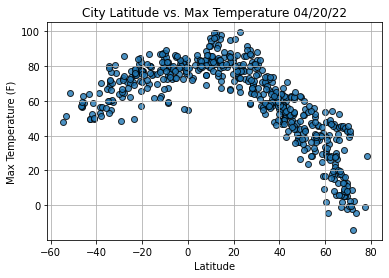

In [46]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

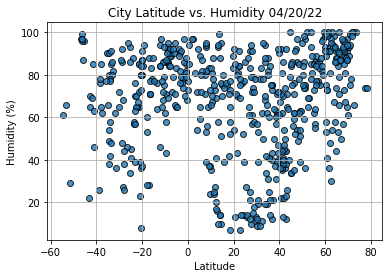

In [47]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

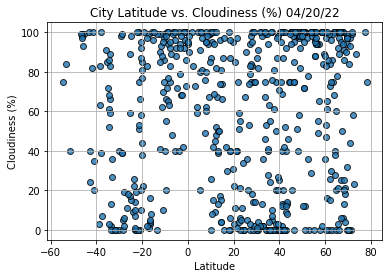

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

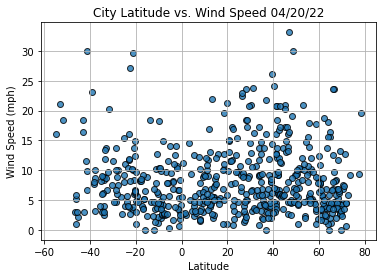

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()